<a href="https://colab.research.google.com/github/iamharishpatil/pro1/blob/main/COVID_19_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls
%cd drive/MyDrive/miniproject2
!ls

drive  sample_data
/content/drive/MyDrive/miniproject2
CovidDataset


In [3]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"



In [4]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [5]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [7]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')


Found 224 images belonging to 2 classes.


In [9]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [10]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [12]:
hist = model.fit_generator(
    train_generator,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
7/7 [==============================] - 27s 4s/step - loss: 0.6859 - accuracy: 0.5536 - val_loss: 0.6876 - val_accuracy: 0.5667
Epoch 2/10
7/7 [==============================] - 9s 1s/step - loss: 0.6668 - accuracy: 0.6696 - val_loss: 0.6560 - val_accuracy: 0.9167
Epoch 3/10
7/7 [==============================] - 9s 1s/step - loss: 0.6072 - accuracy: 0.7054 - val_loss: 0.5429 - val_accuracy: 0.9333
Epoch 4/10
7/7 [==============================] - 9s 1s/step - loss: 0.4463 - accuracy: 0.7679 - val_loss: 0.2577 - val_accuracy: 0.9333
Epoch 5/10
7/7 [==============================] - 9s 1s/step - loss: 0.3693 - accuracy: 0.7723 - val_loss: 0.2246 - val_accuracy: 0.9500
Epoch 6/10
7/7 [==============================] - 9s 1s/step - loss: 0.2939 - accuracy: 0.8705 - val_loss: 0.1256 - val_accuracy: 0.9667
Epoch 7/10
7/7 [==============================] - 9s 1s/step - loss: 0.3042 - accuracy: 0.8482 - val_loss: 0.0818 - val_accuracy: 0.9833
Epoch 8/10
7/7 [========================

In [ ]:
0# Class Activation Maps
# Grad-CAM 

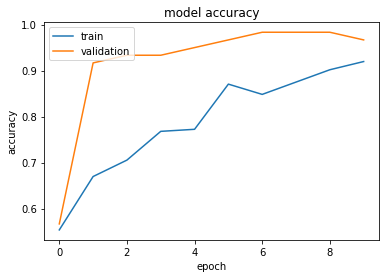

In [13]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

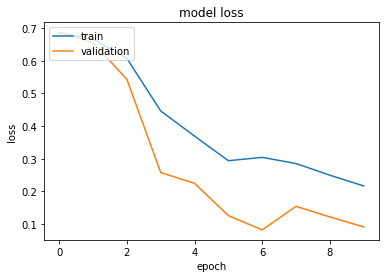

In [14]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()